In [21]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [22]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

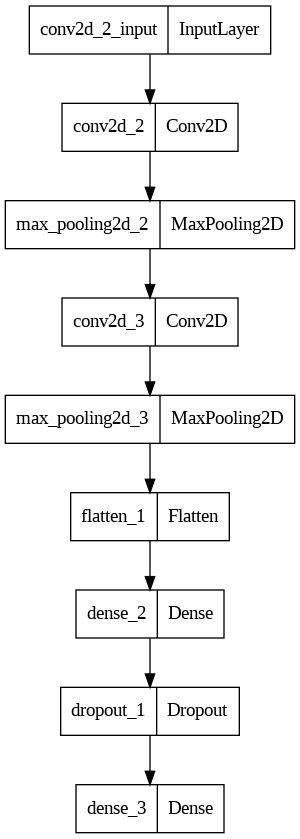

In [25]:
keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 60s 39ms/step - loss: 0.5302 - accuracy: 0.8104 - val_loss: 0.3324 - val_accuracy: 0.8770
Epoch 2/20
   3/1500 [..............................] - ETA: 45s - loss: 0.5014 - accuracy: 0.7917

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 60s 40ms/step - loss: 0.3479 - accuracy: 0.8742 - val_loss: 0.2780 - val_accuracy: 0.8963
Epoch 3/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2963 - accuracy: 0.8927 - val_loss: 0.2491 - val_accuracy: 0.9063
Epoch 4/20
1500/1500 [==============================] - 59s 40ms/step - loss: 0.2635 - accuracy: 0.9044 - val_loss: 0.2323 - val_accuracy: 0.9120
Epoch 5/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2391 - accuracy: 0.9125 - val_loss: 0.2377 - val_accuracy: 0.9097
Epoch 6/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2194 - accuracy: 0.9188 - val_loss: 0.2229 - val_accuracy: 0.9157
Epoch 7/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2021 - accuracy: 0.9252 - val_loss: 0.2186 - val_accuracy: 0.9185
Epoch 8/20
1500/1500 [==============================] - 59s 40ms/step - loss: 0.1866 - accuracy: 0.9291 - val_loss: 0.2167 - val_accura

In [17]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

# 간단한 CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(1 * 2 * 2, 12)
        self.fc2 = nn.Linear(12, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 1 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleCNN()

# 임의의 입력 데이터 생성
input_data = torch.randn(1, 3, 4, 4)

# 모델의 출력 계산
output = model(input_data)

# 모델의 그래프 생성
graph = make_dot(output, params=dict(model.named_parameters()))

# 그래프 시각화
graph.render("simple_cnn", format="png")


'simple_cnn.png'